In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing , reading the csv file (pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)          # Set now of columns visible to 100

In [3]:
print("Current Working Directory - "+os.getcwd()) # Current Working Directory

Current Working Directory - /Users/abhi011097/Workspace/Dataset_Analysis/1_Credit_Card_Analysis


In [4]:
df=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/1_Credit_Card_Analysis/Dataset/Credit_card_transactions.csv")

In [5]:
print(df.columns)

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')


### 0 | Check and Clean Dataframe

In [6]:
# Check First five 
df.head() # data.head(10)
#df.tail()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [7]:
df.info()  # As the count of non null equals to rangeindex , we can conclude no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [8]:
df.drop(columns='index',inplace=True) # Removing the irrelevent Column

In [9]:
df=df.replace(', India','', regex=True) # Since India is common

### 1 | Comment on numerical summary for Quantitative variable as well as Categorical variables

In [10]:
df.describe(include='O') # To describe stats for categorical column

,City,Date,Card Type,Exp Type,Gender
count,26052,26052,26052,26052,26052
unique,986,600,4,6,2
top,Bengaluru,20-Sep-14,Silver,Food,F
freq,3552,65,6840,5463,13680


***
1. On looking the summary for Categorical variables We got to know about the following points : - 
***
   - Bengaluru is most frequent in transactions. 
   - Silver is the most used card Category type.
   - Most of the transactions are done in food Category. 
   - Female Does the most no of transactions.               
***

### 2 | Observe distribution of Amount

In [11]:
df['Amount'].describe() # To describe stats for quantitative column

count     26052.000000
mean     156411.537425
std      103063.254287
min        1005.000000
25%       77120.250000
50%      153106.500000
75%      228050.000000
max      998077.000000
Name: Amount, dtype: float64

Skewness for amount 1.7550705661419843



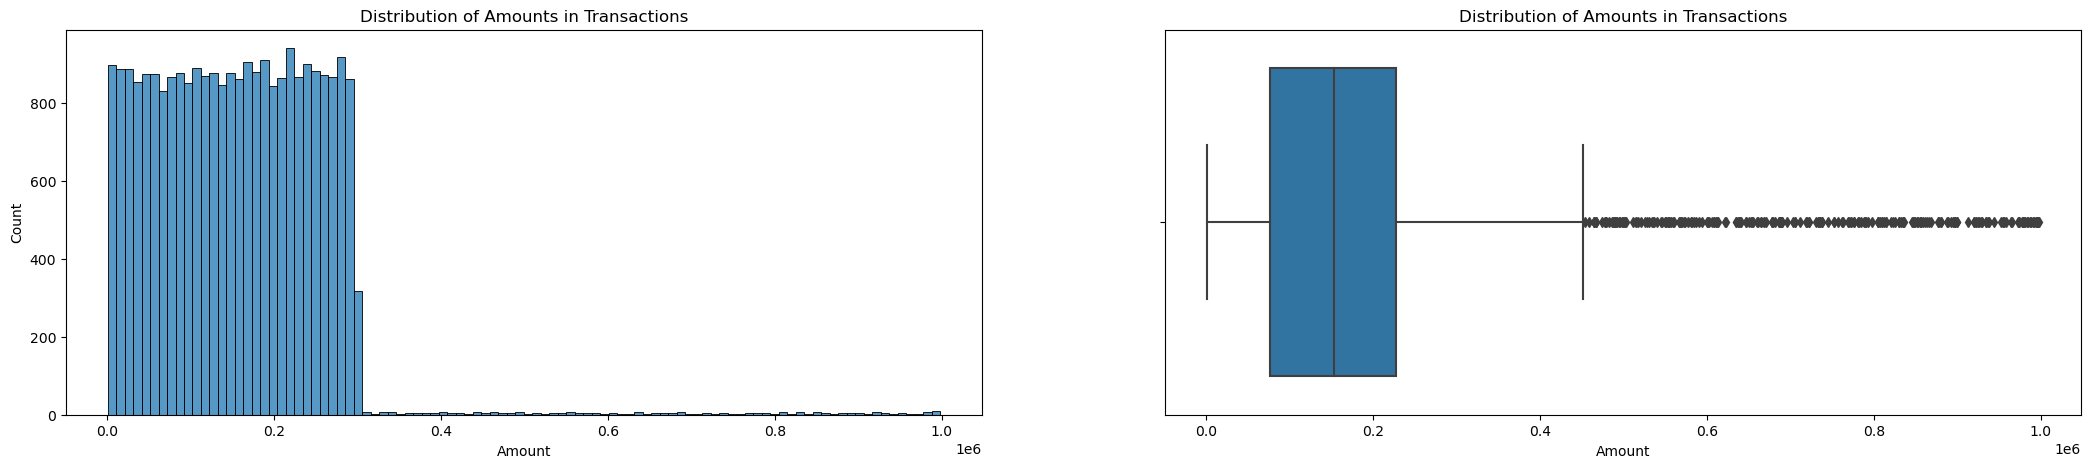

In [12]:
print("Skewness for amount " + str(df["Amount"].skew())+"\n")

plt.subplots(1,2,figsize=(26,5))

plt.subplot(1,2,1)
sns.histplot(x=df["Amount"])
plt.title("Distribution of Amounts in Transactions")


plt.subplot(1,2,2)
sns.boxplot(x=df["Amount"])
plt.title("Distribution of Amounts in Transactions")

plt.show()

2. On looking the Distribution of Amount
    
    *******
    * Using Describe Summary 
         * we can see amount ranging from 1005 to 998077
             - 25% of transactions amount lies between 1005 to 77k. 
             - Middle 50 % of transactions lies between 77k to 228k. 
             - 25 % of transaction lies between 228k to 998k.     
    
    *******
    
    * Using skewness method 
        * we got the skewnss for the amount which was 1.7 and anything greater then 1 is highly skewed.
        
    *******
    * Using Histplot 
        * we observed It followed a uniform distribution with high peaks initially starting from thousand to around 3 lakh.
        * Followed by few no of transactions upto 10 lakh (negligible compared to above).
        * Since it does not follow Normal distribution so iqr method gives the proper view of outliers.
        
    *******    
    * Using Boxplot
        * we can observe the above same stats as describe (approx)
        * we can see the presence of outlier shown as points after whisker end (which extended eitherways to 1.5 times the iqr from q3,q1 by default).
    *******
        
        

### 3.1 | Comment on count distribution of City (With Visualization)

In [13]:
city=pd.DataFrame({'count' : df.groupby("City").size()}).reset_index()

print("\n")
print("Top 3 City  ->  "+str(city.nlargest(3,'count')['City'].tolist()))
print("\n")
print("Last 3 City ->  " + str(city.nsmallest(3,'count')['City'].tolist()))
print("\n")



Top 3 City  ->  ['Bengaluru', 'Greater Mumbai', 'Ahmedabad']


Last 3 City ->  ['Alirajpur', 'Bagaha', 'Changanassery']




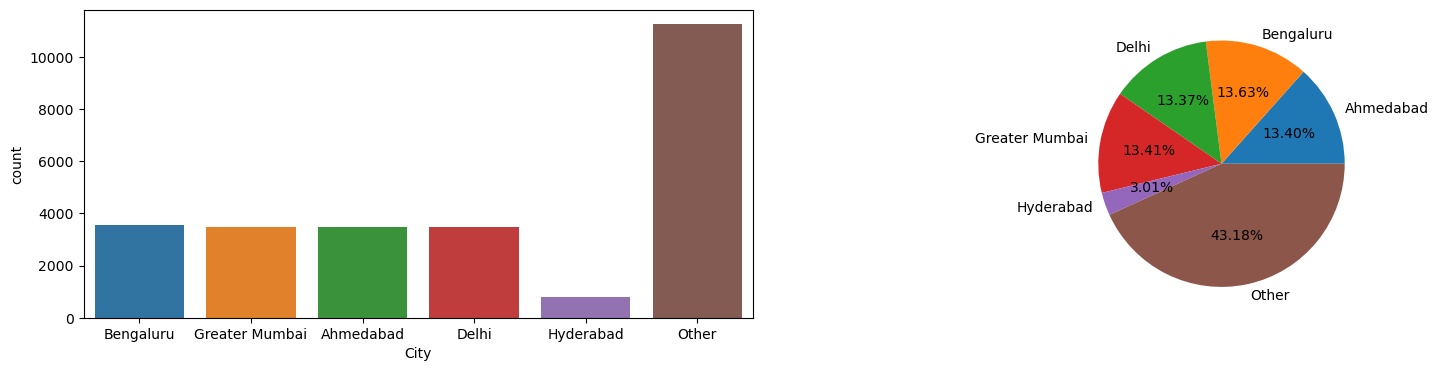

In [14]:
#pd.DataFrame({'count' : df.groupby(  "City").size()}).reset_index()  # to get the result as df 
city_cropped=city.copy()
city_cropped.loc[~(city_cropped.City.isin(city_cropped.nlargest(5,'count')['City'].tolist())),'City']='Other'
city_cropped=city_cropped.groupby("City").sum().reset_index()

#For Ordering
set_ord=city.nlargest(5,'count')['City'].tolist()
set_ord.append("Other")

plt.subplots(1,2,figsize=(19,4))

plt.subplot(1,2,1)
sns.barplot(x=city_cropped['City'], y=city_cropped['count'],order=set_ord)

plt.subplot(1,2,2)
plt.pie(x=city_cropped["count"],labels=city_cropped["City"],autopct="%0.2f%%")

plt.show()


3. On Observing the city column 

***
   * Group by 
        * we get the top 3 city as per no of transactions using nlargest fucntion.
        * we got the bottom 3 city as per no of transactions using nsmallest function.
***   
   * Barplot
        * Bengaluru has the highest peak with the most no of transactions
        * Peak between top 4 does not have sharp deviation but moving to 5 we see a sharp drop in peak  
        * this gives fair idea about the importance of top 4 but it will be better to observe proportion
***       
   * Pieplot
    
       * This gives us the idea that first 5 out of 986 countries contributes over 56.8% of the transactions.
       * other 981 contributes to around 43.2% of the transactions
***
##### " Since there were many catergories so Before visualizing we grouped  all city's other then top 5 into 'Others' so we now have 6 categories in city column "
***

       
       

### 3.2 |   Relation of city with card type /gender wise / exp type  distribution

In [15]:
# Without using added mask column for city 
#pd.DataFrame({'count' : df.groupby(  "City").size()}).reset_index()  # to get the result as df 

city_gender_cropped=pd.DataFrame({'count' : df.groupby(["City",'Gender']).size()}).reset_index() 
city_gender_cropped.loc[~(city_gender_cropped.City.isin(city_cropped.nlargest(6,'count')['City'].tolist())),'City']='Other'
city_gender_cropped=city_gender_cropped.groupby(['City','Gender']).sum().reset_index()
city_gender_cropped

,City,Gender,count
0,Ahmedabad,F,1876
1,Ahmedabad,M,1615
2,Bengaluru,F,1960
3,Bengaluru,M,1592
4,Delhi,F,1923
5,Delhi,M,1559
6,Greater Mumbai,F,1922
7,Greater Mumbai,M,1571
8,Hyderabad,F,389
9,Hyderabad,M,395


In [16]:
df['City_Mask']=np.where(df.City.isin(city.nlargest(5,'count')['City'].tolist()), df.City, 'Other')

In [17]:
# With Mask Column
df.groupby(["City_Mask",'Card Type']).size()

City_Mask       Card Type
Ahmedabad       Gold          809
                Platinum      900
                Signature     828
                Silver        954
Bengaluru       Gold          857
                Platinum      853
                Signature     859
                Silver        983
Delhi           Gold          863
                Platinum      791
                Signature     872
                Silver        956
Greater Mumbai  Gold          848
                Platinum      868
                Signature     820
                Silver        957
Hyderabad       Gold          194
                Platinum      210
                Signature     192
                Silver        188
Other           Gold         2796
                Platinum     2776
                Signature    2876
                Silver       2802
dtype: int64

In [18]:
df.groupby(["City_Mask",'Exp Type']).size()

City_Mask       Exp Type     
Ahmedabad       Bills             680
                Entertainment     622
                Food              801
                Fuel              760
                Grocery           628
Bengaluru       Bills             735
                Entertainment     624
                Food              805
                Fuel              780
                Grocery           608
Delhi           Bills             701
                Entertainment     594
                Food              784
                Fuel              782
                Grocery           621
Greater Mumbai  Bills             728
                Entertainment     614
                Food              742
                Fuel              762
                Grocery           647
Hyderabad       Bills             142
                Entertainment     134
                Food              138
                Fuel              129
                Grocery           142
                Trav

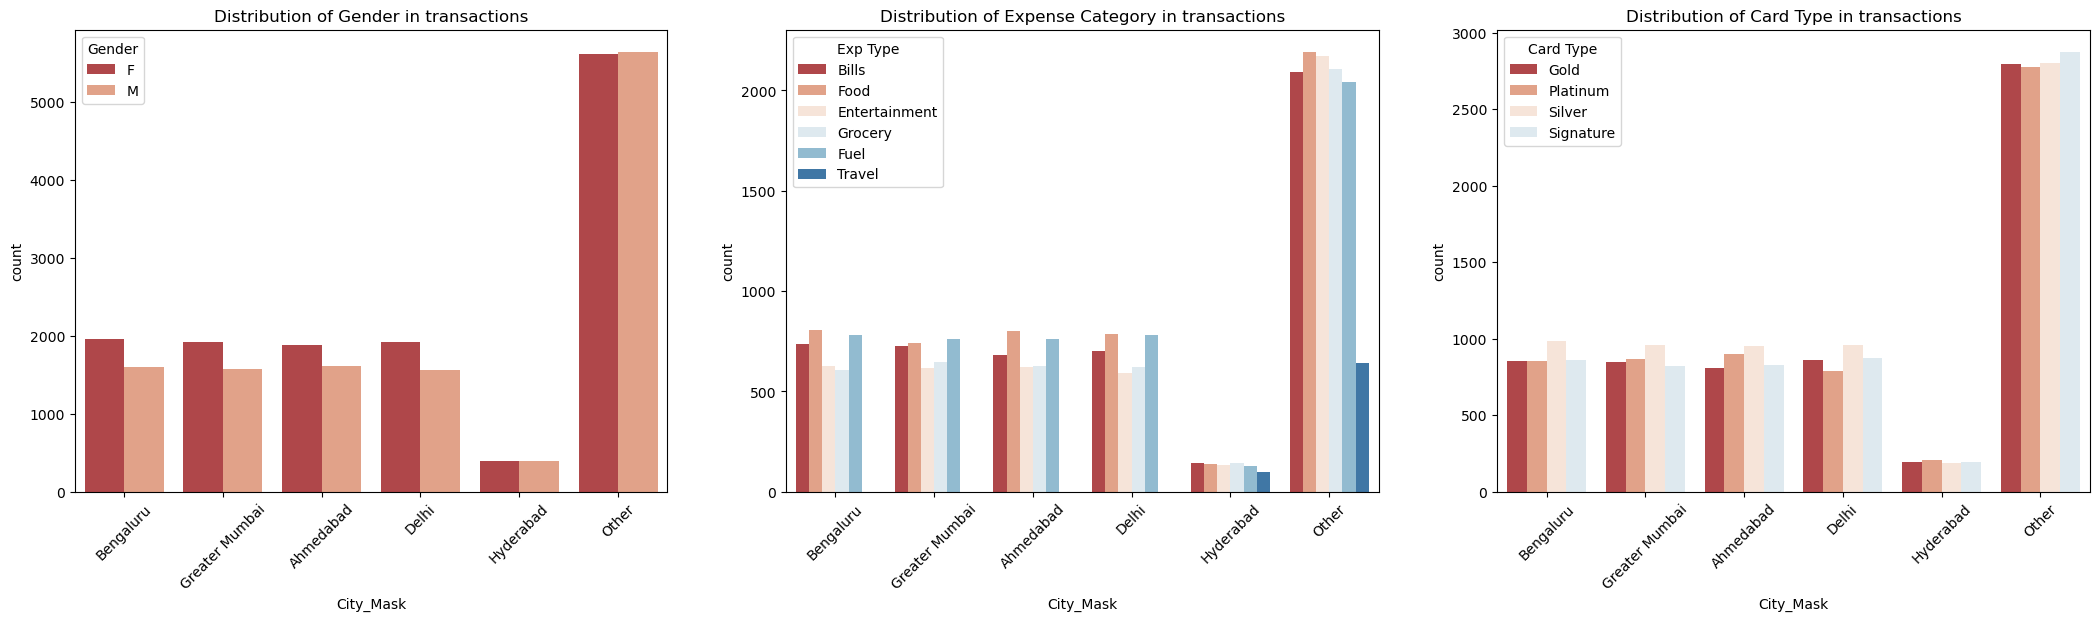

In [19]:
#most_city=pd.DataFrame({'count' : df.groupby("City").size()}).reset_index().nlargest(5,'count')['City']
#sns.countplot(x=df.loc[df['City'].isin(most_city.to_list())]['City'] , hue=df['Gender'])

plt.subplots(1,3,figsize=(26,6))

plt.subplot(1,3,1)
sns.countplot(x=df["City_Mask"],hue=df['Gender'],order=set_ord,palette=sns.color_palette("RdBu"))
plt.xticks(rotation=45)
plt.title("Distribution of Gender in transactions")

plt.subplot(1,3,2)
sns.countplot(x=df["City_Mask"],hue=df['Exp Type'],order=set_ord,palette=sns.color_palette("RdBu"))
plt.xticks(rotation=45)
plt.title("Distribution of Expense Category in transactions")

plt.subplot(1,3,3)
sns.countplot(x=df["City_Mask"],hue=df['Card Type'],order=set_ord,palette=sns.color_palette("RdBu"))
plt.xticks(rotation=45)
plt.title("Distribution of Card Type in transactions")


plt.show()


***
##### Distribution of gender in top 5 city

  * Using Countplot and Group (Group by city followed by Gender) 
    
       * In top 4 city ['Bengaluru', 'Greater Mumbai', 'Ahmedabad','Delhi'] females Dominates no of transactions 
       * The diff in no of transactions for female over man ranges from 200 to 400 in each of the city 
       * Male dominates over Hyderabad with minor difference of 6  
       * Male dominates over "Other" (rest of city combined ) with few no's around to 30-40 
        
***        
##### Distribution of Card Type in top 5 city

   *  Using Countplot and Group (Group by city followed by Card)
        
       * Silver is the most used card type in top 4 city(with most trxns) ['Bengaluru', 'Greater Mumbai', 'Ahmedabad','Delhi']
       * Platinum card user does the most no of transactions in hyderabad 
       * While in rest of the city "Other" signature is the most and platinum the least used card
            
***            
##### Distribution of Exp Type in top 5 city

   *  Using Countplot and Group (Group by city followed by Card)
        
       * Food is most frequent expense category in "OTHERS" and 3 out of top 4 city(with most trxns) ['Bengaluru', 'Ahmedabad','Delhi']
       * In Hyderabad Bills and Grocery exceeds food category with minor difference of 4
       * In Greater Mumbai fuel category has the most frequent transactions
       * There is no transactions done in top 4 city for travel category.
***

### 3.3 | Relation of city with amount

In [20]:
df.groupby('City_Mask').describe()

Amount                                                  \
                  count           mean            std     min       25%   
City_Mask                                                                 
Ahmedabad        3491.0  162645.176167  114120.339438  1024.0  80439.00   
Bengaluru        3552.0  161128.023367  110598.455781  1074.0  78969.75   
Delhi            3482.0  159945.207352  115475.932554  1005.0  73174.75   
Greater Mumbai   3493.0  165116.368737  120265.126185  1056.0  81374.00   
Hyderabad         784.0  146037.598214   84837.804389  1070.0  75278.00   
Other           11250.0  149914.503022   86508.250250  1018.0  74889.00   

                                               
                     50%        75%       max  
City_Mask                                      
Ahmedabad       155813.0  231673.50  996291.0  
Bengaluru       158051.0  229747.00  987935.0  
Delhi           152373.5  231531.75  996754.0  
Greater Mumbai  158108.0  233161.00  998077.0  
Hyderabad       144765.5  212849.25  299751.0  
Other           150772.5  224664.25  299980.0

In [ ]:
total_amt_city=df.groupby('City_Mask').sum('Amount')[:-1].reset_index()
total_amt_city

,City_Mask,Amount
0,Ahmedabad,567794310
1,Bengaluru,572326739
2,Delhi,556929212
3,Greater Mumbai,576751476
4,Hyderabad,114493477


In [22]:
df.groupby('City_Mask').skew()

,Amount
City_Mask,
Ahmedabad,2.223663
Bengaluru,2.097024
Delhi,2.300529
Greater Mumbai,2.415261
Hyderabad,0.057490
Other,-0.002719


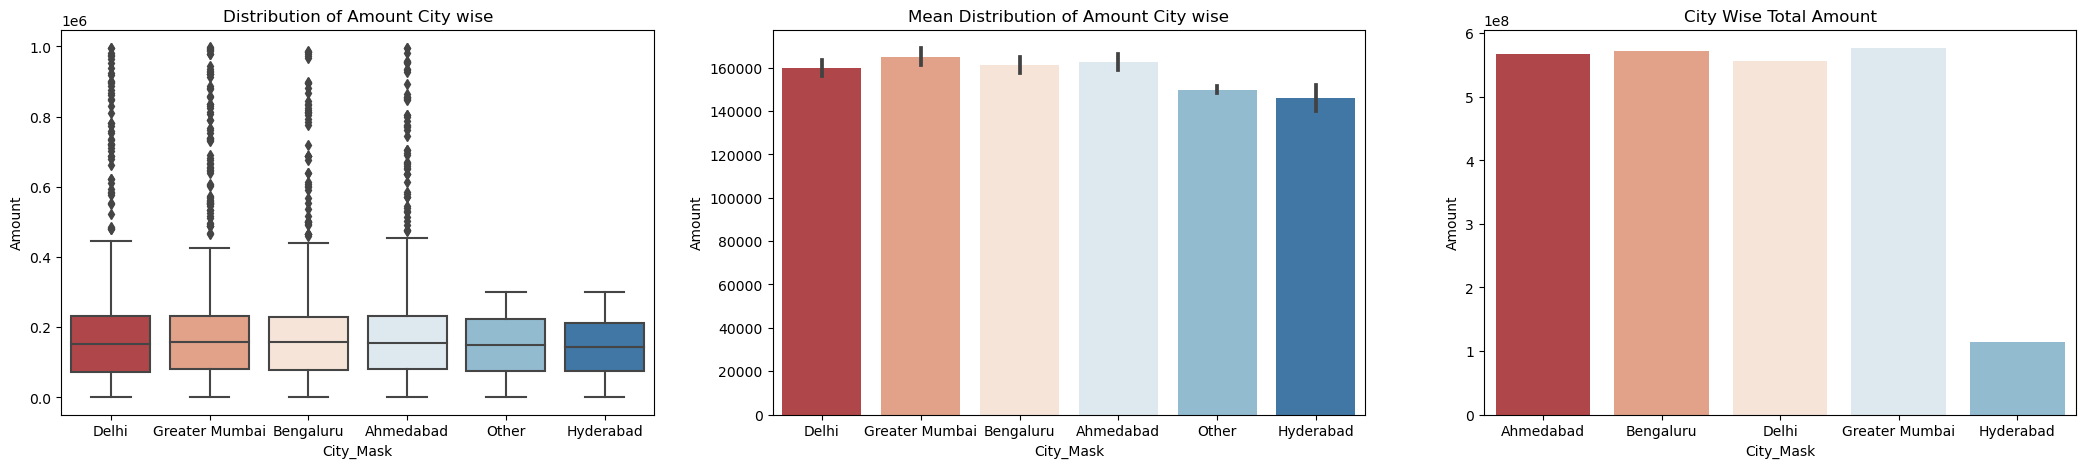

In [64]:
plt.subplots(1,3,figsize=(26,5))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='City_Mask' ,y='Amount',palette=sns.color_palette("RdBu"))
plt.title("Distribution of Amount City wise")

plt.subplot(1,3,2)
sns.barplot(x=df["City_Mask"],y=df["Amount"],palette=sns.color_palette("RdBu"))
plt.title("Mean Distribution of Amount City wise")

plt.subplot(1,3,3)
sns.barplot(x=total_amt_city["City_Mask"], y=total_amt_city['Amount'],palette=sns.color_palette("RdBu"))
plt.title("City Wise Total Amount")

plt.show()

### Comment on count distribution of 3 categories ( Card Type , Exp Type ,  Gender )

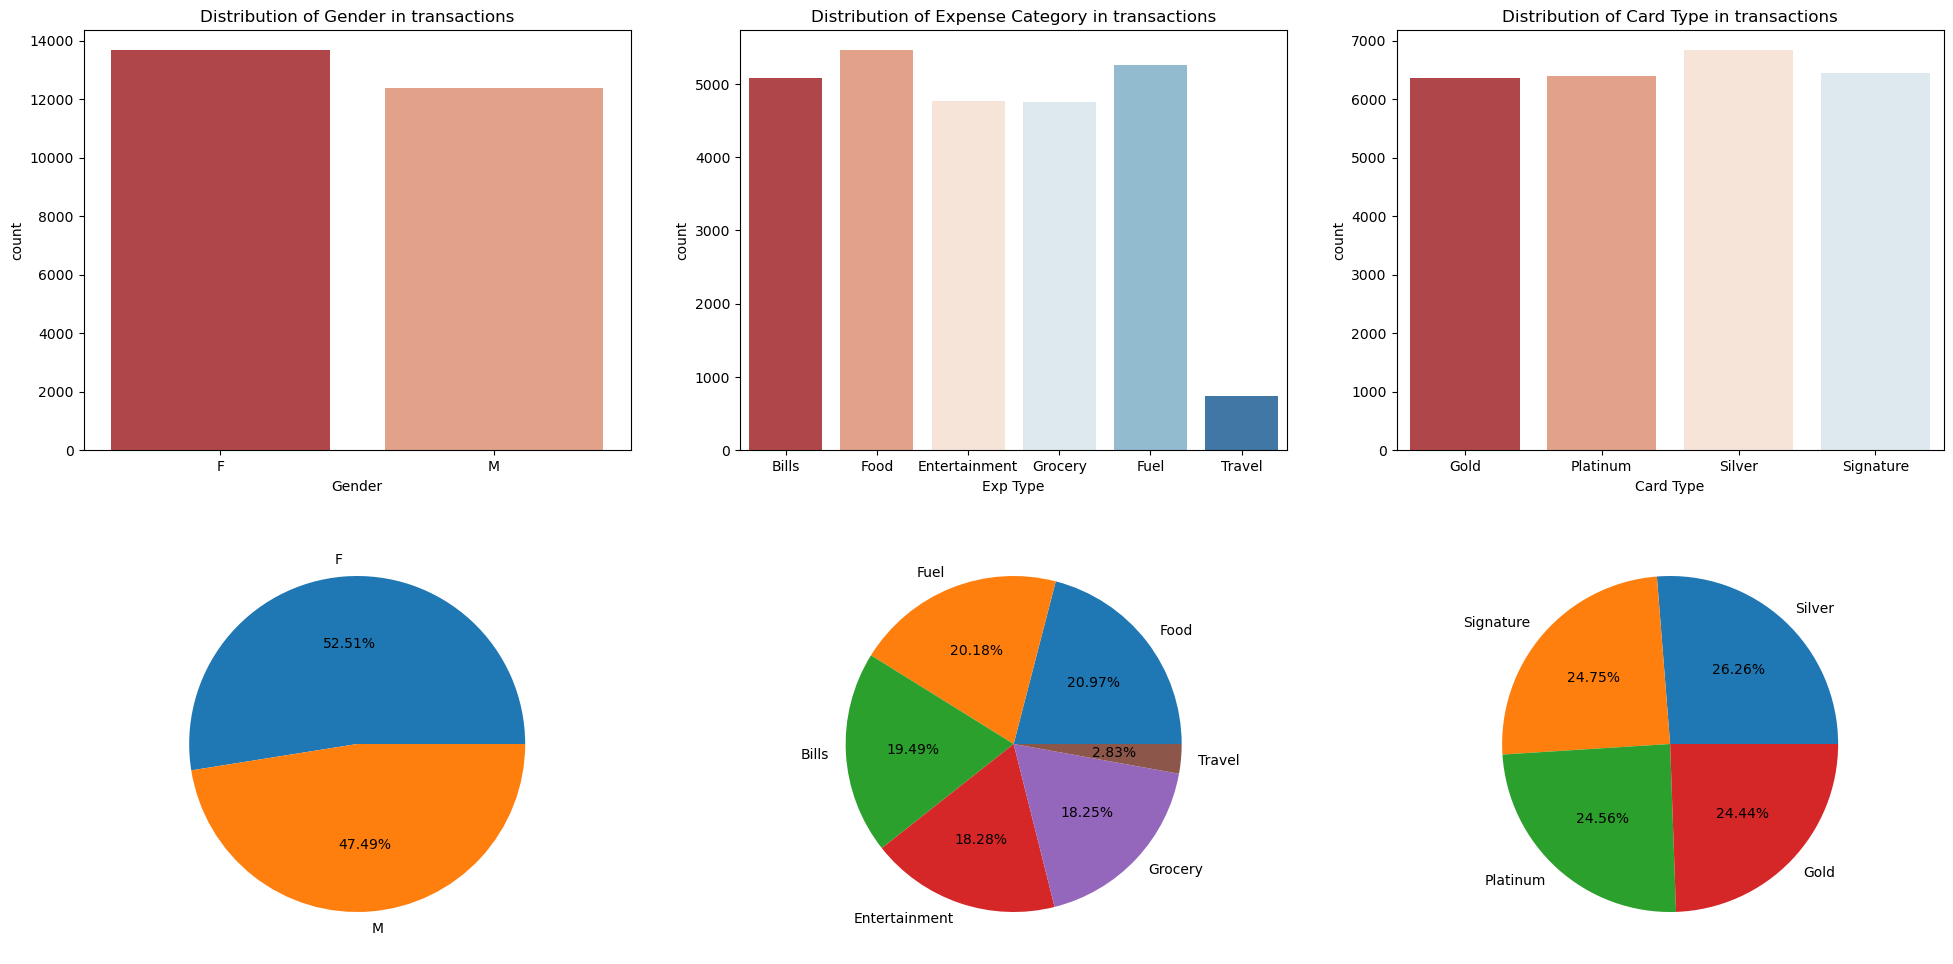

In [24]:
# For Individual 
# Gender distribution
# plt.figure(figsize=(4,3)) # (width,height)
# sns.countplot(x=df["Gender"])
# plt.title("Distribution of Gender in transactions")
# plt.show()


# For Multiple

plt.subplots(2,3,figsize=(24,12))

plt.subplot(2,3,1)
sns.countplot(x=df["Gender"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Gender in transactions")

plt.subplot(2,3,2)
sns.countplot(x=df["Exp Type"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Expense Category in transactions")

plt.subplot(2,3,3)
sns.countplot(x=df["Card Type"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Card Type in transactions")

plt.subplot(2,3,4)
plt.pie(x=df["Gender"].value_counts(),labels=df["Gender"].value_counts().index,autopct="%0.2f%%")

plt.subplot(2,3,5)
plt.pie(x=df["Exp Type"].value_counts(),labels=df["Exp Type"].value_counts().index,autopct="%0.2f%%")

plt.subplot(2,3,6)
plt.pie(x=df["Card Type"].value_counts(),labels=df["Card Type"].value_counts().index,autopct="%0.2f%%")
plt.show()

In [25]:
# Graph - Distribution of Gender in transactions
    # It tells the no of transactions done by female is 5 % more then the male


# Graph - Distribution of Expense Category in transactions
    # We have 6 different categories
    # Food has the highest 20.97%
    # We can see most of Exp type categories (5 out of 6) has transaction share between 18.25 to 20.97 
    # We have (travel) 1 out of 6 category which has the least share with 2.83 %
    
    
# Graph - Distribution of Card Type in transactions
    # We have 4 different card type categories
    # All 4 transaction share lie between 24.44 % to 26.26 %
    # Silver is the most used card type

#### Answers 

In [26]:
# Which card type is highly and least used ?
    # Silver is the highest used card & Gold is the least
    
# In which expense category customer does most and least number of transactions  happens ?
    # Food has the highest no of transactions 
    # Travel has the lowest no of transactions

# Who does the most no of transactions (Males or Females)
    # Females has the most no of transactions 
    

### Maximimum and minimum contribution to amount for ( Card Type , Exp Type ,  Gender )

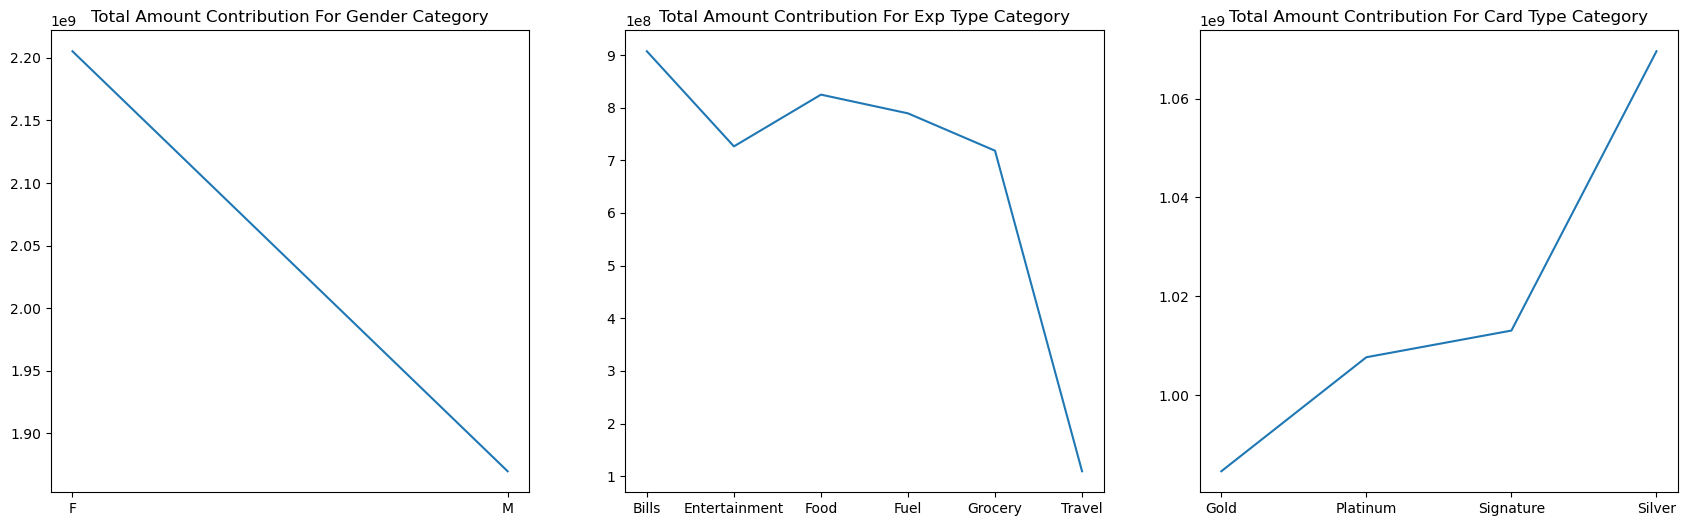

In [27]:
plt.subplots(1,3,figsize=(21,6))
plt.subplot(1,3,1)
plt.plot(df.groupby('Gender').sum())
plt.title("Total Amount Contribution For Gender Category")

plt.subplot(1,3,2)
plt.plot(df.groupby('Exp Type').sum())
plt.title("Total Amount Contribution For Exp Type Category")

plt.subplot(1,3,3)
plt.plot(df.groupby('Card Type').sum())
plt.title("Total Amount Contribution For Card Type Category")


plt.show()

In [28]:
#Answers

# Which card type has the highest & least contribution to total amount 
        # Silver has the highest overall amount while gold is least 
    
# Which Exp Type has the highest & least contribution to total amount 
        # Bills has the highest overall amount while travel is least
    
# Which Gender Type has the highest & least contribution to total amount
        # Female has the highest overall amount then men
           

### 5 point summary wrt amount for each subcategories of ( Card Type , Exp Type ,  Gender )

In [29]:
df.groupby('Gender').describe()

Amount                                                            \
          count           mean            std     min       25%       50%   
Gender                                                                      
F       13680.0  161206.946637  115965.163236  1005.0  77128.50  154797.0   
M       12372.0  151109.145086   86282.544283  1018.0  77102.25  151242.0   

                             
              75%       max  
Gender                       
F       230407.75  998077.0  
M       225900.00  299981.0

In [30]:
df.groupby('Card Type').describe()

Amount                                                            \
            count           mean            std     min       25%       50%   
Card Type                                                                     
Gold       6367.0  154631.621800  105800.484508  1038.0  74389.50  150431.0   
Platinum   6398.0  157492.813223  102051.710950  1005.0  79394.75  154215.0   
Signature  6447.0  157133.721886  104385.788773  1024.0  76500.00  153972.0   
Silver     6840.0  156376.273830  100127.272753  1018.0  78180.00  154028.5   

                                
                 75%       max  
Card Type                       
Gold       224538.50  996754.0  
Platinum   227670.25  998077.0  
Signature  230244.50  994537.0  
Silver     230039.75  955468.0

In [31]:
df.groupby('Exp Type').describe()

Amount                                                  \
                count           mean            std     min       25%   
Exp Type                                                                
Bills          5078.0  178627.899370  151893.760199  1026.0  78831.75   
Entertainment  4762.0  152548.831583   86628.587025  1061.0  77749.25   
Food           5463.0  150965.405272   86492.589170  1018.0  75862.50   
Fuel           5257.0  150111.436371   85929.342308  1038.0  77405.00   
Grocery        4754.0  151074.447413   86440.356185  1005.0  75648.25   
Travel          738.0  148042.833333   86627.487531  1070.0  73909.00   

                                              
                    50%        75%       max  
Exp Type                                      
Bills          160551.0  237895.50  998077.0  
Entertainment  153994.5  228414.75  299936.0  
Food           151679.0  225387.50  299837.0  
Fuel           149629.0  224409.00  299905.0  
Grocery        152157.5  225550.50  299920.0  
Travel         146947.0  221778.75  299618.0

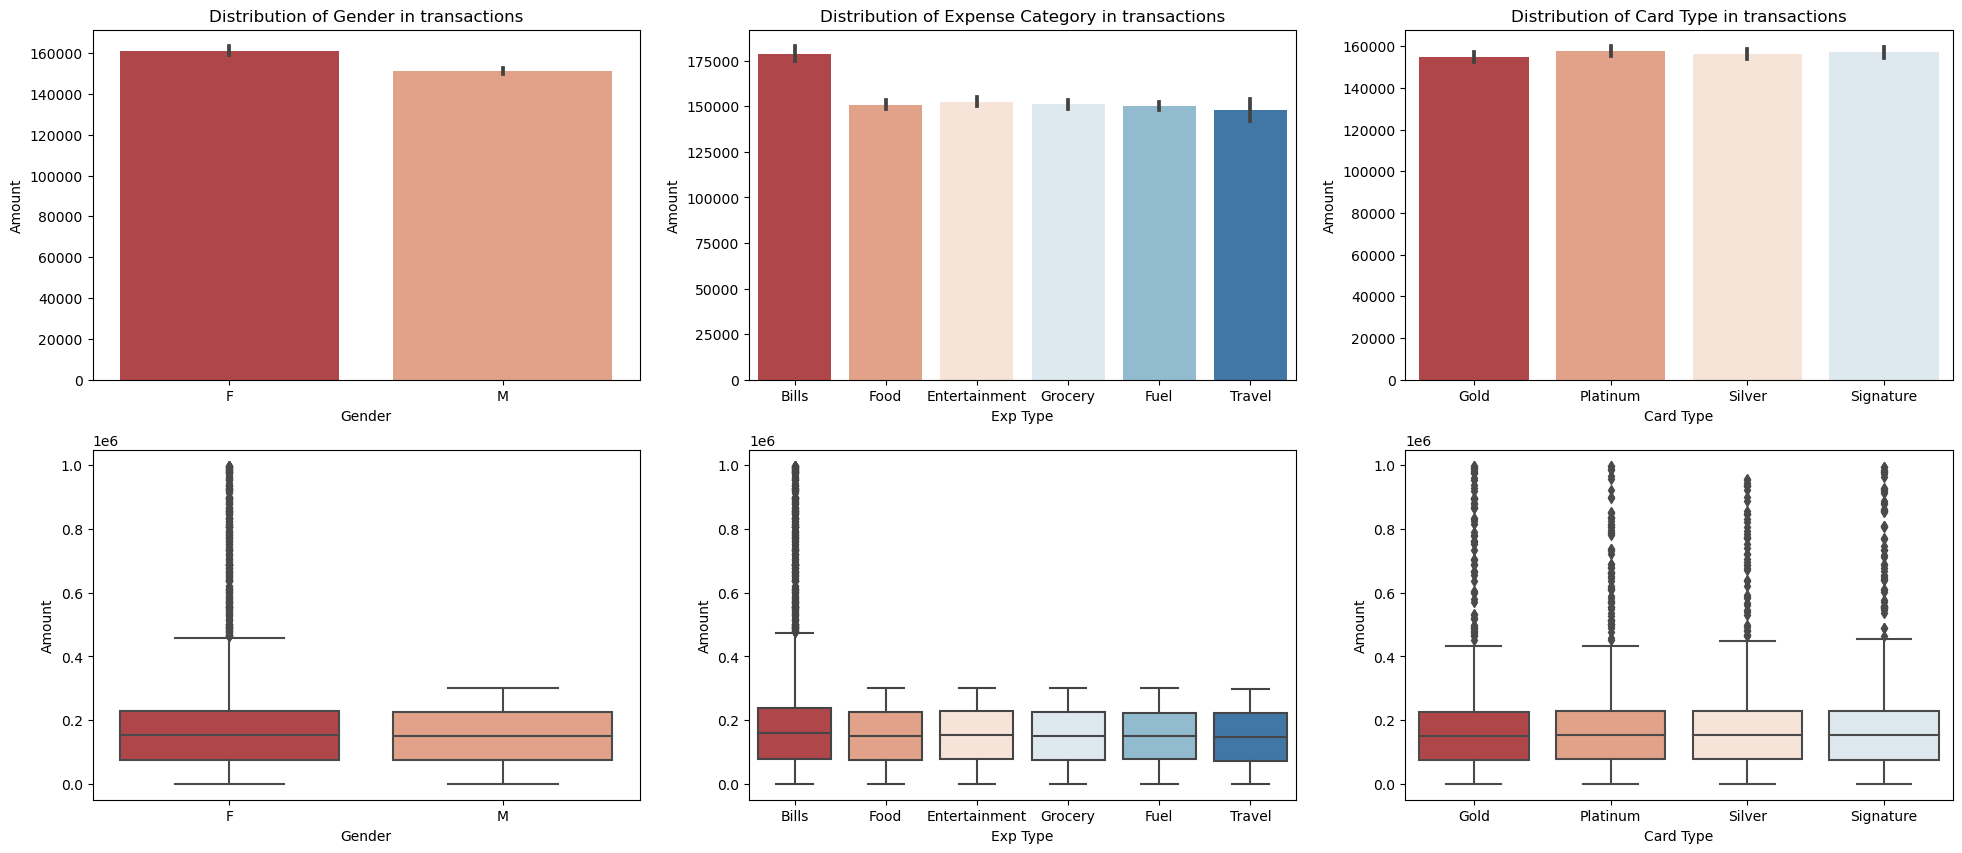

In [32]:
plt.subplots(2,3,figsize=(24,10))

plt.subplot(2,3,1)
sns.barplot(x=df["Gender"],y=df["Amount"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Gender in transactions")

plt.subplot(2,3,2)
sns.barplot(x=df["Exp Type"],y=df["Amount"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Expense Category in transactions")

plt.subplot(2,3,3)
sns.barplot(x=df["Card Type"],y=df["Amount"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Card Type in transactions")


plt.subplot(2,3,4)
sns.boxplot(data=df,x='Gender' ,y='Amount',palette=sns.color_palette("RdBu"))

plt.subplot(2,3,5)
sns.boxplot(data=df,x='Exp Type' ,y='Amount',palette=sns.color_palette("RdBu"))

plt.subplot(2,3,6)
sns.boxplot(data=df,x='Card Type' ,y='Amount',palette=sns.color_palette("RdBu"))

plt.show()



In [33]:
#df.groupby('Gender').describe()
print("\n******** Skewness for Gender Type ********\n")
print(df.groupby('Gender').skew())
print("\n******** Skewness for Exp Type ********\n")
print(df.groupby('Exp Type').skew())
print("\n******** Skewness for Card Type ********\n")
print(df.groupby('Card Type').skew())


******** Skewness for Gender Type ********

          Amount
Gender          
F       2.298093
M      -0.018652

******** Skewness for Exp Type ********

                 Amount
Exp Type               
Bills          2.525439
Entertainment -0.029375
Food          -0.021597
Fuel           0.007120
Grocery       -0.023394
Travel         0.027052

******** Skewness for Card Type ********

             Amount
Card Type          
Gold       2.068331
Platinum   1.679931
Signature  1.822768
Silver     1.413590


In [34]:
# Comment on Median and Mean of Gender Type ?
    # Median is almost close.
    # Mean for female seems to be high which is influenced by presence of transactions having high amount value.

# Comment on Median and Mean of Card Type 
   # Median is almost close for all subcategories in Card Type
   # Mean for Bills seems to be high which is influenced by presence of transactions having high amount value.
    
# Comment on Median and Mean of Exp Type 
   # Median is almost close for all subcategories in Card Type
   # Mean is almost close for all subcategories in Card Type 

# Does any of the sub category among category Gender Type has skewness 
   # Looking at the box plot as well as skewness value we can say female transactions are highly skewed

# Does any of the sub category among category Card Type has skewness  
  # Looking at the box plot as well as skewness value we can say Bill Category for transactions are highly skewed

# Does any of the sub category among category Exp Type has skewness
  # All sub category has skewness 

### Comment on count distribution of Gender among (Exp Type ,  Card Type )

In [35]:
df.groupby(["Exp Type","Gender"]).size()

Exp Type       Gender
Bills          F         2860
               M         2218
Entertainment  F         2384
               M         2378
Food           F         3012
               M         2451
Fuel           F         2617
               M         2640
Grocery        F         2428
               M         2326
Travel         F          379
               M          359
dtype: int64

In [36]:
df.groupby(["Card Type","Gender"]).size()

Card Type  Gender
Gold       F         3287
           M         3080
Platinum   F         3252
           M         3146
Signature  F         3368
           M         3079
Silver     F         3773
           M         3067
dtype: int64

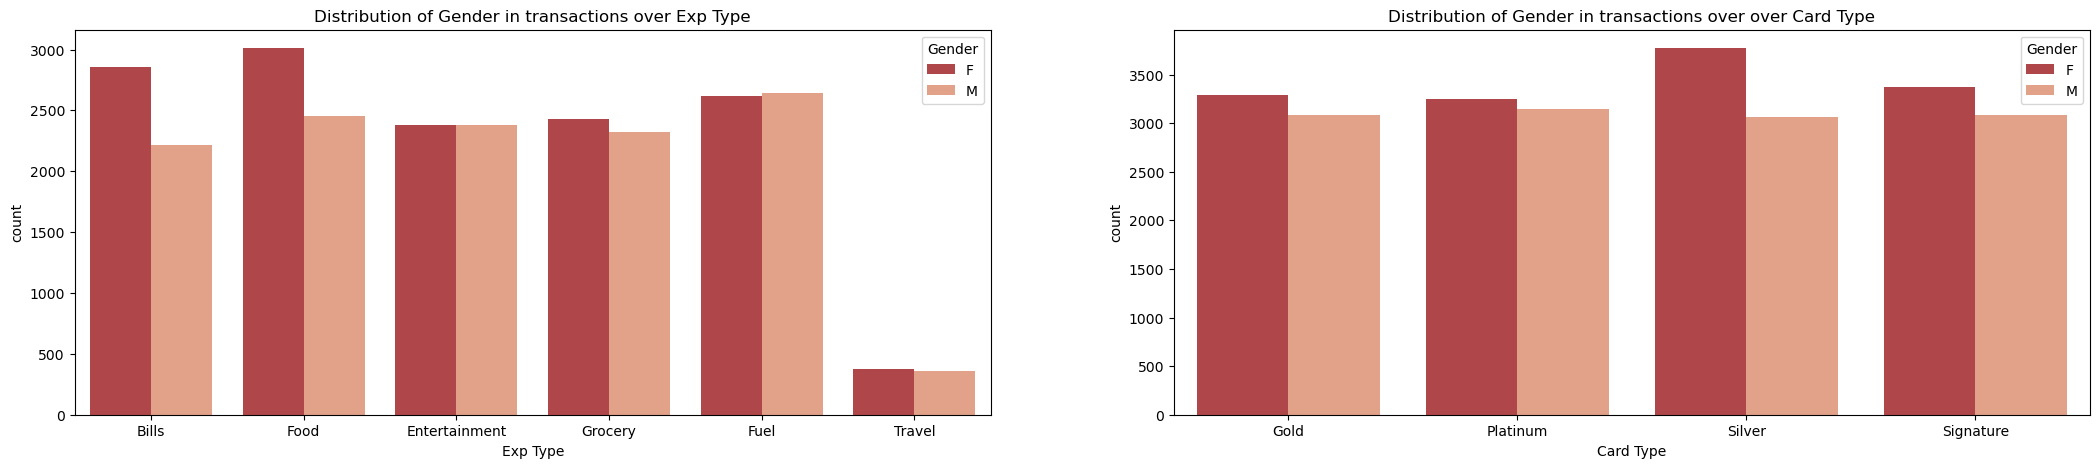

In [37]:
plt.subplots(1,2,figsize=(26,5))
plt.subplot(1,2,1)
sns.countplot(x=df["Exp Type"],hue=df["Gender"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Gender in transactions over Exp Type")

plt.subplot(1,2,2)
sns.countplot(x=df["Card Type"],hue=df["Gender"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Gender in transactions over over Card Type")
plt.show()

In [38]:
#Answers
            # Any subcategory in Exp type where no of transactions dominates for men
                # Only in Fuel subcategory  
            # Any subcategory in Card type where no of transactions dominates for men
                # No , All subcategories dominated by womens

### Observe Relationship between card type and exp type (Vice Versa)

In [39]:
df.groupby(["Exp Type","Card Type"]).size()

Exp Type       Card Type
Bills          Gold         1256
               Platinum     1229
               Signature    1259
               Silver       1334
Entertainment  Gold         1143
               Platinum     1187
               Signature    1170
               Silver       1262
Food           Gold         1322
               Platinum     1371
               Signature    1329
               Silver       1441
Fuel           Gold         1315
               Platinum     1302
               Signature    1286
               Silver       1354
Grocery        Gold         1119
               Platinum     1130
               Signature    1224
               Silver       1281
Travel         Gold          212
               Platinum      179
               Signature     179
               Silver        168
dtype: int64

In [40]:
df.groupby(["Card Type","Exp Type"]).size()

Card Type  Exp Type     
Gold       Bills            1256
           Entertainment    1143
           Food             1322
           Fuel             1315
           Grocery          1119
           Travel            212
Platinum   Bills            1229
           Entertainment    1187
           Food             1371
           Fuel             1302
           Grocery          1130
           Travel            179
Signature  Bills            1259
           Entertainment    1170
           Food             1329
           Fuel             1286
           Grocery          1224
           Travel            179
Silver     Bills            1334
           Entertainment    1262
           Food             1441
           Fuel             1354
           Grocery          1281
           Travel            168
dtype: int64

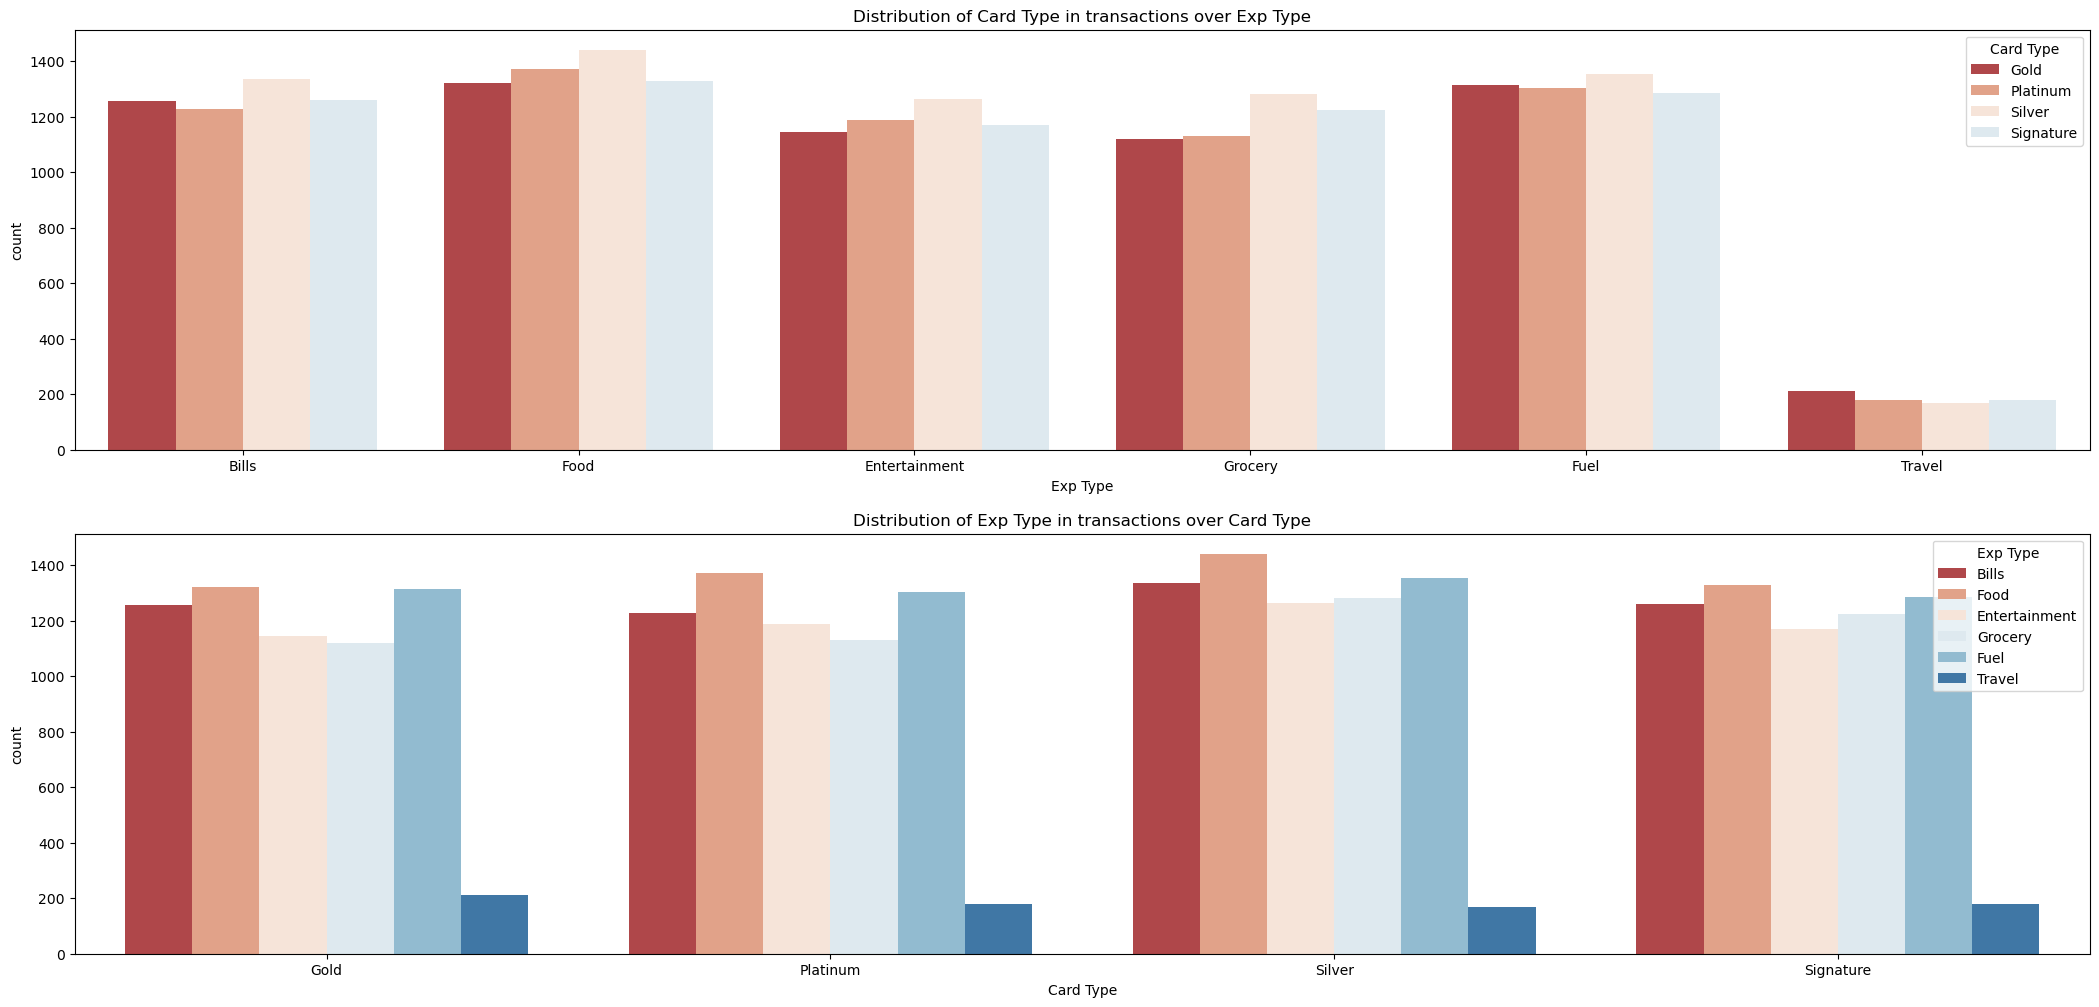

In [41]:
plt.subplots(2,1,figsize=(26,12))

plt.subplot(2,1,1)
sns.countplot(x=df["Exp Type"],hue=df["Card Type"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Card Type in transactions over Exp Type")

plt.subplot(2,1,2)
sns.countplot(x=df["Card Type"],hue=df["Exp Type"],palette=sns.color_palette("RdBu"))
plt.title("Distribution of Exp Type in transactions over Card Type")
plt.show()

In [42]:
# Answers
    # Which Card type dominates most of the subcategories of Exp type
        # Silver card holder dominates in all sub categories except Travel.
        # Gold card holder has most transactions in travel sector
    
    # Which exp type dominates most of the subcategories of Card Type
        # Food is the most frequent category in all card types & travel being the least 